# Sales Analysis of a Company 

## Objective

To Solve business questions which help stake holders in taking informed decision like when  and in which city to display advertisements.

### Importing Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline 

### Task 1 : Reading all datasets and concating them into a single dataset
Steps I have taken to complete this task:
-      **Reading all file names in a list**
-      **Importing all datasets one by one in this project using loop**
-      **Merging all 12 datasets in one csv file**
-      **Saving final csv file in the directory**

In [2]:
# Reading All File Names in a list

files = os.listdir("Sales_Data/")

files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
salesData = pd.DataFrame()

# Importing all datasets one by one and Merging them in a single Dataset
for file in files:
    df = pd.read_csv("Sales_Data/"+file)
    salesData = pd.concat([salesData,df])

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Saving Combined Dataset in Directory
salesData.to_csv('SalesData.csv')


### Task 2: Data Cleanup
Steps I have done to clean Dataset

-    **Droping all Nan Values**
-    **Creating Month, Income, City, Hour  Columns**
-    **Deleting all rows with repeating headings**


In [5]:
# Checking if Nan Values available in dataset
salesData.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [6]:
# Droping Nan values if complete column is Na
salesData = salesData.dropna(how='all')
salesData 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
# Checking if more Nan Values available
salesData.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [8]:
# Creating Month Column from Order Date Column
salesData['Month'] = salesData['Order Date'].str[0:2]

## Dataset Contains Repeating Headings
salesData[salesData['Month'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [9]:
## Droping Rows with repeating headings
salesData = salesData[salesData['Order Date'].str[0:2] != 'Or']

## Checking again if Repeating heading still available
print(salesData[salesData['Month'].str.contains('Or')])


#Converting String Month Column into Numbers
salesData['Month'] = pd.to_numeric(salesData['Month'])

salesData.head()

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Month]
Index: []


<ipython-input-9-a6f31210f178>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesData['Month'] = pd.to_numeric(salesData['Month'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
#Creating Income Column with multiplying Quantity Ordered Column to Price Each
salesData['Income'] = salesData['Quantity Ordered'].astype('int32') * salesData['Price Each'].astype('float')

salesData.head()

<ipython-input-10-b898dc22f51c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesData['Income'] = salesData['Quantity Ordered'].astype('int32') * salesData['Price Each'].astype('float')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
# Converting Quantity Ordered and Price each into respective numeric types

salesData['Quantity Ordered'] = pd.to_numeric(salesData['Quantity Ordered'])
salesData['Price Each'] = pd.to_numeric(salesData['Price Each'])

<ipython-input-14-561e94fee24d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesData['Quantity Ordered'] = pd.to_numeric(salesData['Quantity Ordered'])
<ipython-input-14-561e94fee24d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesData['Price Each'] = pd.to_numeric(salesData['Price Each'])


In [34]:
# Adding City Column from Address Column
def getCity(address):
    return address.split(',')[1].strip(" ")
def getState(address):
    return address.split(',')[2].split(" ")[1]

salesData['city'] = salesData['Purchase Address'].apply(lambda x: f"{getCity(x)} ({getState(x)})")
salesData

<ipython-input-34-920c270a86ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesData['city'] = salesData['Purchase Address'].apply(lambda x: f"{getCity(x)} ({getState(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [44]:
# Converting Order Date from string to datetime format

salesData['Order Date'] = pd.to_datetime(salesData['Order Date'])
salesData.head()

<ipython-input-44-4315336a54cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesData['Order Date'] = pd.to_datetime(salesData['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [45]:
# Creating Hour Column in Dataset
salesData['Hour'] = salesData['Order Date'].dt.hour
salesData

<ipython-input-45-7470b71f8048>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesData['Hour'] = salesData['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Income,city,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


## Question 1 : What was the best month for sales? How much was earned that month?

In [15]:
## Grouping Dataset with Month Column and getting sum
monthlyData = salesData.groupby(['Month']).sum()
monthlyData.head()

,Quantity Ordered,Price Each,Income
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


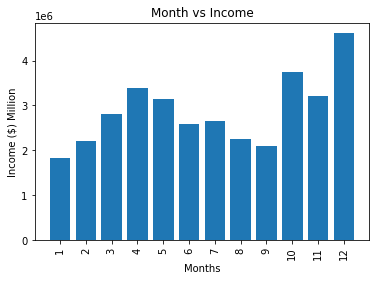

In [22]:
## Visualising data to check which month was the best for sales 
months = range(1,13)
plt.bar(months,monthlyData['Income'])
plt.xticks(months,rotation='vertical')
plt.xlabel("Months")
plt.ylabel("Income ($) Million")
plt.title("Month vs Income")
plt.show()

## Question 2: What City Sold the most product?

In [37]:
# Grouping Dataset based on City 
cityData = salesData.groupby(['city']).sum()

cityData.head()

,Quantity Ordered,Price Each,Month,Income
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06


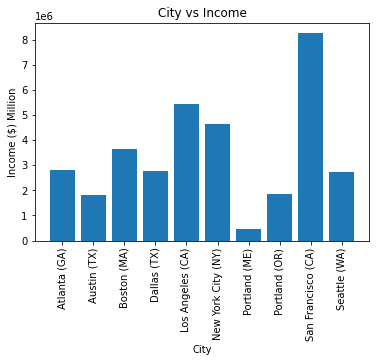

In [43]:
## Visualising data to check which City Sold the most products 
cities = [city for city, df in salesData.groupby(['city'])]
plt.bar(cities,cityData['Income'])
plt.xticks(cities,rotation='vertical')
plt.xlabel("City")
plt.ylabel("Income ($) Million")
plt.title("City vs Income")
plt.show()

## Question 3: what time should we display advertisements to maximize the likely hood of purchases? 

In [47]:
# Grouping Dataset based on Hours 
hourData = salesData.groupby(['Hour']).sum()

hourData.head()

,Quantity Ordered,Price Each,Month,Income
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01


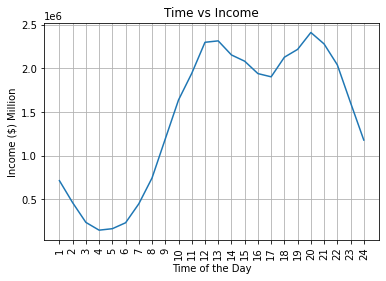

In [50]:
## Visualising data to check which is the best time to show advertisement 
hours =range(1,25)
plt.plot(hours,hourData['Income'])
plt.xticks(hours,rotation='vertical')
plt.xlabel("Time of the Day")
plt.ylabel("Income ($) Million")
plt.title("Time vs Income")
plt.grid()
plt.show()

## Question 4: what product sold the most? why do you think it sold the most?

In [52]:
# Grouping Dataset based on Products 
productDataset = salesData.groupby(['Product']).sum()

productDataset.head()

,Quantity Ordered,Price Each,Month,Income,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342


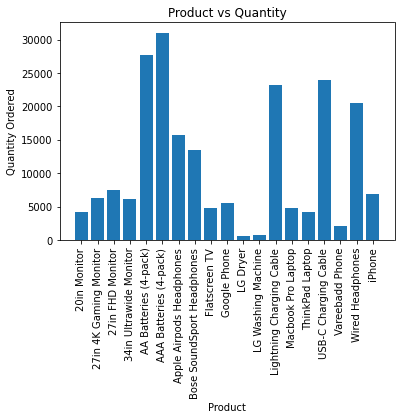

In [56]:
## Visualising data to check which product sold the most
product = [Product for Product, df in salesData.groupby(['Product'])]
plt.bar(product,productDataset['Quantity Ordered'])
plt.xticks(product,rotation='vertical')
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Product vs Quantity")
plt.show()

<ipython-input-62-cf79e3bc2c8e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical')


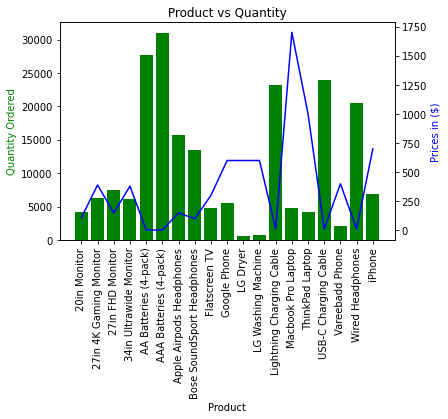

In [62]:
# Checking Why these products sold most
prices = salesData.groupby(['Product']).mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, productDataset['Quantity Ordered'], color='g')
ax2.plot(product, prices, 'b-')

ax1.set_xticklabels(product,rotation='vertical')
ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered", color='g')
ax1.set_title("Product vs Quantity")

ax2.set_ylabel('Prices in ($)', color='b')

plt.show()